# TICA / BPTI Example

In [2]:
import pyemma

In [3]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pyemma.coordinates as coor

In [5]:
import pyemma.msm as pmsm
import pyemma.plots as pp

BPTI 1 ms trajectory - load data
------

We will be using the 1 millisecond trajectory of Bovine Pancreatic Trypsin Inhibitor (BPTI) generated by DE Shaw Research on the Anton Supercomputer [1]. In order to make the data size manageable we have saved only the Ca-coordinates and only every 10 ns, resulting in about 100000 frames.

First we define coordinate and topology input file by pointing to a local data directory. Note that instead of using a single trajectory file you could specify a list of many trajectory files here - the rest of the analysis stays the same.

In [6]:
trajfile = 'data/bpti_ca_1ms_dt10ns.xtc'
topfile = 'data/bpti_ca.pdb'

Now we decide which coordinates we would like to use in the further analysis. Since this trajectory is already RMSD-aligned we can simply use the Cartesian coordinates, here Ca-coordinates:

In [7]:
feat = coor.featurizer(topfile)
# just use all coordinates
feat.add_all()

In [8]:
feat.describe()

['ATOM:ARG 1 CA 0 x',
 'ATOM:ARG 1 CA 0 y',
 'ATOM:ARG 1 CA 0 z',
 'ATOM:PRO 2 CA 1 x',
 'ATOM:PRO 2 CA 1 y',
 'ATOM:PRO 2 CA 1 z',
 'ATOM:ASP 3 CA 2 x',
 'ATOM:ASP 3 CA 2 y',
 'ATOM:ASP 3 CA 2 z',
 'ATOM:PHE 4 CA 3 x',
 'ATOM:PHE 4 CA 3 y',
 'ATOM:PHE 4 CA 3 z',
 'ATOM:CYS 5 CA 4 x',
 'ATOM:CYS 5 CA 4 y',
 'ATOM:CYS 5 CA 4 z',
 'ATOM:LEU 6 CA 5 x',
 'ATOM:LEU 6 CA 5 y',
 'ATOM:LEU 6 CA 5 z',
 'ATOM:GLU 7 CA 6 x',
 'ATOM:GLU 7 CA 6 y',
 'ATOM:GLU 7 CA 6 z',
 'ATOM:PRO 8 CA 7 x',
 'ATOM:PRO 8 CA 7 y',
 'ATOM:PRO 8 CA 7 z',
 'ATOM:PRO 9 CA 8 x',
 'ATOM:PRO 9 CA 8 y',
 'ATOM:PRO 9 CA 8 z',
 'ATOM:TYR 10 CA 9 x',
 'ATOM:TYR 10 CA 9 y',
 'ATOM:TYR 10 CA 9 z',
 'ATOM:THR 11 CA 10 x',
 'ATOM:THR 11 CA 10 y',
 'ATOM:THR 11 CA 10 z',
 'ATOM:GLY 12 CA 11 x',
 'ATOM:GLY 12 CA 11 y',
 'ATOM:GLY 12 CA 11 z',
 'ATOM:PRO 13 CA 12 x',
 'ATOM:PRO 13 CA 12 y',
 'ATOM:PRO 13 CA 12 z',
 'ATOM:CYS 14 CA 13 x',
 'ATOM:CYS 14 CA 13 y',
 'ATOM:CYS 14 CA 13 z',
 'ATOM:LYS 15 CA 14 x',
 'ATOM:LYS 15 CA 14 y',
 

Load the coordinates from disc. Often, coordinates will not fit into memory, so we'll just create a loader by specifying the source files as follows:

In [9]:
inp = coor.source(trajfile, feat)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())

trajectory length =  103125
number of dimension =  174


time-lagged independent component analysis (TICA)
----------
Run TICA for a series of lag times. Select a suitable lag time for dimensionality reduction.

In [10]:
dt = 0.01
lag_list = np.arange(50, 501, 50)
nlags = lag_list.shape[0]

lag_=lag_list[0]

ts = list()

for lag_ in lag_list:
    t = coor.tica(inp,lag=lag_)
    ts.append(t_kin.timescales[:5])

NameError: name 't_kin' is not defined

In [11]:
lag_list

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

In [12]:
t_kin = coor.tica(inp,lag=lag_, dim=2)
t_nk = coor.tica(inp, lag=lag_, kinetic_map=False, dim=2)

Run TICA at the selected lag time with and without kinetic map scaling.

In [13]:
out = list([t_kin.get_output()[0], t_nk.get_output()[0]])

Plot the first two TICA components from both models. 
Use pyemma.plots.plot_free_energy

In [14]:
#print(out.shape)
#x_vals=[out[i][0] for i in range(len(out))]
#y_vals=[out[i][1] for i in range(len(out))]

#x_vals=[out[0][i][0] for i in range(len(out[0]))]
#y_vals=[out[0][i][1] for i in range(len(out[0]))]

#pyemma.plots.plot_free_energy(x_vals, y_vals)
type(out[0])

numpy.ndarray

/home/johnrobot/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(<matplotlib.figure.Figure at 0x7effbdca85f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7effbdcb3d68>)

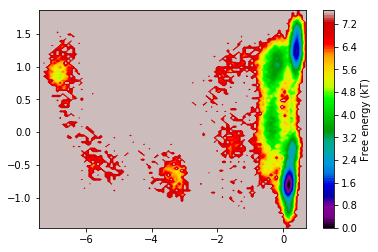

In [15]:
pyemma.plots.plot_free_energy(out[0][:,0], out[0][:,1])

Experiment with different featurizations!

/home/johnrobot/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(<matplotlib.figure.Figure at 0x7effbdc4a208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7effb2e57ba8>)

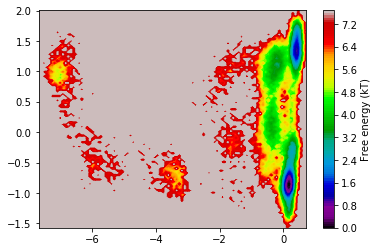

In [16]:
pyemma.plots.plot_free_energy(out[1][:,0], out[1][:,1])

Clustering the data
------

we use k-means clustering and get the discrete trajectories

In [18]:
Y=out
cl = coor.cluster_kmeans(data=Y)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs

23-05-17 11:29:32 pyemma.coordinates.clustering.kmeans.KmeansClustering[6] INFO     The number of cluster centers was not specified, using min(sqrt(N), 5000)=454 as n_clusters.
23-05-17 11:30:02 pyemma.coordinates.clustering.kmeans.KmeansClustering[6] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


MSM
---

In [19]:
M = pmsm.estimate_markov_model(dtrajs, 200)

Spectral analysis
-----------

Let us have a closer look at the timescales that were already seen in the its plot:

(-0.5, 10.5)

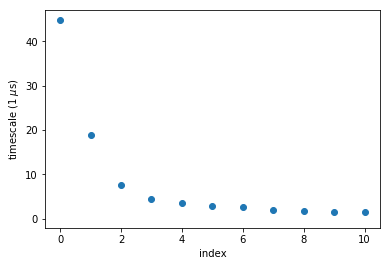

In [20]:
plot(dt*M.timescales(),linewidth=0,marker='o')
xlabel('index'); ylabel(r'timescale (1 $\mu$s)'); xlim(-0.5,10.5)

## PCCA

Select a suitable number of metastable states and run PCCA.

In [22]:
pccr=M.pcca(3)

Visualize the PCCA assignments in the free energy landscape defined by the first two TICA coordinates.
Hints: A Markov model object has an attribute M.metastable_sets. Also, you need to find out how to access the clustercenters defined in the previous step.

In [67]:
#pccr.metastable_sets[0]
cl.clustercenters[pccr.metastable_sets[0]]

array([[-6.03944731, -0.53588617],
       [-3.03171277, -0.96696484],
       [-6.90735292,  1.20423543],
       [-2.30682826,  0.22765636],
       [-3.69132018, -0.43562582],
       [-6.77658176,  0.17997931],
       [-4.95301628, -0.40192854],
       [-6.35502195,  0.17703359],
       [-6.87580919,  0.73508352],
       [-3.40801907, -0.84956741],
       [-6.98319197,  0.88374931],
       [-6.4655261 ,  0.75458795],
       [-5.71905851, -0.50468647],
       [-4.16396427, -0.19722244],
       [-3.15139318, -0.38591185],
       [-7.19762468,  0.99673164],
       [-3.99156284, -0.85692447],
       [-5.77199459,  0.1687534 ],
       [-6.67984676,  1.03451741],
       [-6.32416582, -0.44602615],
       [-6.26548767,  1.16542923],
       [-3.01341558, -0.64697331],
       [-3.41049314, -0.46811146],
       [-4.98794317, -0.68457913],
       [-5.35285664, -0.3591941 ],
       [-4.18622684, -0.63165951],
       [-4.43309355, -0.3656683 ],
       [-7.12815619,  1.27512836],
       [-5.07182407,

/home/johnrobot/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


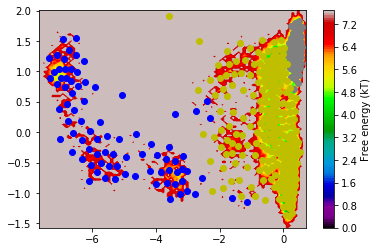

In [75]:
pyemma.plots.plot_free_energy(out[1][:,0], out[1][:,1])

scatter(cl.clustercenters[pccr.metastable_sets[0],0], cl.clustercenters[pccr.metastable_sets[0],1], marker='o',color='b')
scatter(cl.clustercenters[pccr.metastable_sets[1],0], cl.clustercenters[pccr.metastable_sets[1],1], marker='o',color='0.5')
scatter(cl.clustercenters[pccr.metastable_sets[2],0], cl.clustercenters[pccr.metastable_sets[2],1], marker='o',color='y')

What happens if you vary the number of metastable sets?

References
------

1. Shaw DE, Maragakis P, Lindorff-Larsen K, Piana S, Dror RO, Eastwood MP, Bank JA, Jumper JM, Salmon JK, Shan Y,
Wriggers W: Atomic-level characterization of the structural dynamics of proteins.
*Science* **330**:341-346 (2010). doi: 10.1126/science.1187409.
2. Molgedey, L. and H. G. Schuster, Phys. Rev. Lett. 72, 3634 (1994).
3. Pérez-Hernández, G. and Paul, F. and Giogino, T. and de Fabritiis, G. and Noé, F. Identification of slow molecular order parameters for Markov model construction. *J. Chem. Phys.* **139**:015102 (2013)
4. Swope WC, Pitera JW and Suits F. Describing protein folding kinetics by molecular dynamics simulations: 1. Theory. 
*J. Phys. Chem. B* **108**:6571-6581 (2004)
5. Röblitz S. and M. Weber: Fuzzy spectral clustering by PCCA+: application to Markov state models and data classification. Adv. Data. Anal. Classif. DOI 10.1007/s11634-013-0134-6 (2013) 